In [1]:
import numpy as np
import pionSSA as pssa
import matplotlib.pyplot as plt
import importlib
importlib.reload(pssa)

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 25  
plt.rcParams["xtick.labelsize"] = 20  
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.xmargin'] = 0


In [ ]:
xs = np.logspace(-4, -1, 50)
Q2 = 10

ssa = pssa.PionSSA(fit_type='dis')
nreps = 30

qns = {'u': [], 'd': [], 's': []}
for i in range(nreps):
    ssa.set_params(i+1)

    pdf = np.array([ssa.ppdf_minus(x, Q2) for x in xs])
    for iflav, flav in enumerate(['u','d','s']):
        qns[flav].append(pdf[:, iflav])

--> loaded params from /dipoles/replica_params_dis.csv
--> loaded replica 1
--> loaded replica 1


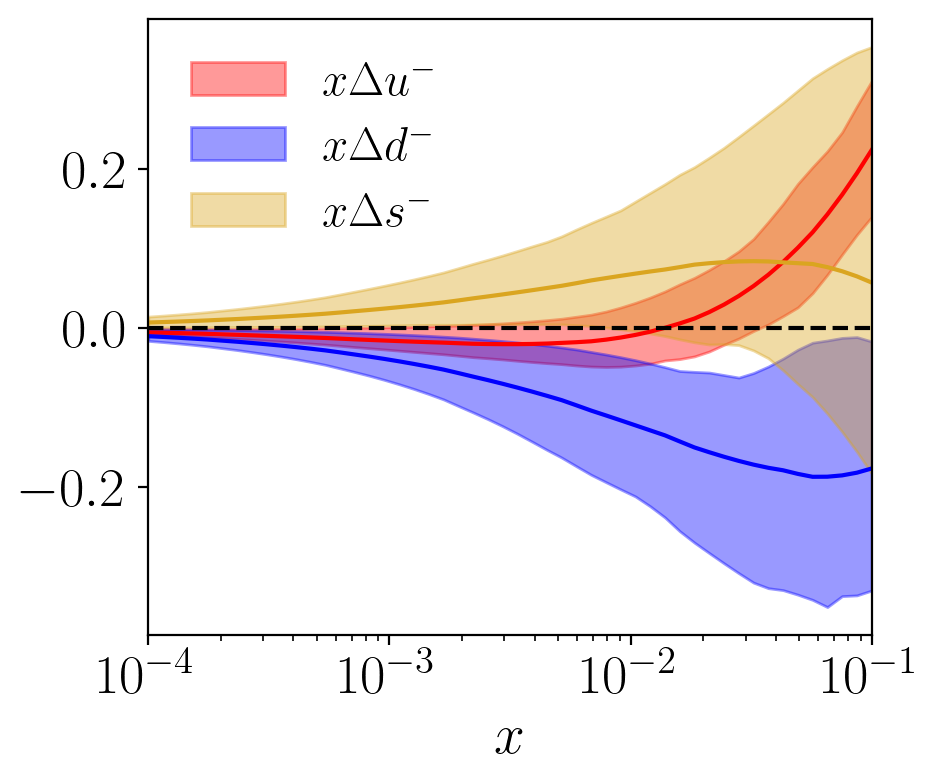

In [57]:
asp_ratio = 3.5/3
psize = 4
nrows, ncols = 1,1
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

color = ['r','b','goldenrod']
flavs = ['u','d','s']

bands = {flav: ssa.get_bands(xs*qns[flav]) for flav in flavs}
plot_bands = True
plot_means = True

labels = [r'$x\Delta u^-$', r'$x\Delta d^-$', r'$x\Delta s^-$']

for iflav,flav in enumerate(flavs):

    if plot_bands:
        ax.fill_between(xs, bands[flav]['lower'], bands[flav]['upper'], alpha=0.4, color=color[iflav], label=labels[iflav])
        if plot_means:
            ax.plot(xs, bands[flav]['mean'], alpha=1.0, color=color[iflav])
    else:
        for i in range(len(qns[flav])):
            if i == 0: label=labels[iflav]
            else: label=None
            ax.plot(xs, xs*qns[flav][i], color=color[iflav], alpha=0.2, label=label)

ax.set_xlabel(r'$x$', size=20)
ax.axhline(y=0, linestyle='--', color='black')
ax.semilogx()
ax.legend(frameon=False, fontsize=17)

plt.show()